## 1. K means image compress (with sklearn)

In [157]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
import numpy as np

In [158]:
pixel = mpimg.imread('dep.jpg')
pixel = pixel.reshape((500*2000 , 3))

In [159]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(pixel)
newPixel = []
for i in kmeans.labels_:
    newPixel.append(list(kmeans.cluster_centers_[i,:]))
newPixel = np.array(newPixel)
kmeans_3 = newPixel.reshape((500,2000,3))

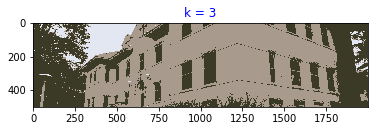

In [160]:
plt.imshow((kmeans_3).astype(np.uint8))
plt.title('k = 3',color='blue') 
plt.show()

## 2. K means image compress (implemention)

In [161]:
import numpy as np
import random
import re
import matplotlib.pyplot as plt

#### Randomly choose k data points as the initial centroids

In [162]:
def initCentroids(dataSet, k):
    dataSet = list(dataSet)
    return random.sample(dataSet, k)

#### calculate L2 distance

In [163]:
def l2Distance(vector1, vector2):
    return sum(np.power(vector2 - vector1, 2))

#### E-step: Group the data based on k centroids

In [164]:
def minDistance(dataSet, centroidList):
    clusterDict = dict()  # dict to store the groups
    k = len(centroidList)
    for item in dataSet:
        vec1 = item
        group = -1
        minDis = float("inf")  # initialize inf
        for i in range(k):
            vec2 = centroidList[i]
            distance = l2Distance(vec1, vec2)  # error
            if distance < minDis:
                minDis = distance
                group = i  # the final group assigned to the item
        if group not in clusterDict.keys():
            clusterDict.setdefault(group, [])
        clusterDict[group].append(item)  # add the item to ite group
    return clusterDict  

#### M-step: Calculate k centroids

In [165]:
def getCentroids(clusterDict):
    centroidList = []
    for key in clusterDict.keys():
        centroid = np.mean(clusterDict[key], axis=0)
        centroidList.append(centroid)
    return centroidList

#### Evaluation: Using distortion measure

In [166]:
def getSSE(centroidList, clusterDict):
    sum = 0.0
    for key in clusterDict.keys():
        vec1 = centroidList[key]
        distance = 0.0
        for item in clusterDict[key]:
            vec2 = item
            distance += l2Distance(vec1, vec2)
        sum += distance
    return sum

#### Data  manipulating

In [167]:
pixel = mpimg.imread('test.png')
pixel = pixel.reshape((128*128, 3))
k = 4
dataSet = pixel 

#### Stopping rule: diff of distortion measure small enough

In [168]:
centroidList = initCentroids(dataSet, k)
clusterDict = minDistance(dataSet, centroidList)
# getCentroids(clusterDict)
# showCluster(centroidList, clusterDict)
newSSE = getSSE(centroidList, clusterDict)
oldSSE = 1

times = 1
while abs(newSSE - oldSSE) >= 0.01:
    centroidList = getCentroids(clusterDict)
    clusterDict = minDistance(dataSet, centroidList)
    oldSSE = newSSE
    newSSE = getSSE(centroidList, clusterDict)
    times += 1

In [169]:
print(newSSE, times)

450.144999264 24


#### Show Compressed Plot

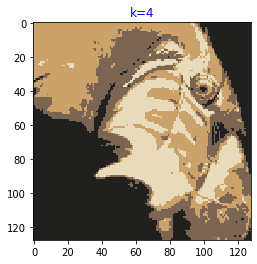

In [171]:
compressNew = []
for item in dataSet:
    vec1 = item
    group = -1
    minDis = float("inf") 
    for i in range(k):
        vec2 = centroidList[i]
        distance = l2Distance(vec1, vec2)  # error
        if distance < minDis:
            minDis = distance
            group = i  
    compressNew.append(centroidList[group])   

compressNew = np.array(compressNew)
compressNew = compressNew.reshape((128,128,3))

plt.imshow(compressNew)         
plt.title('k=4', color='blue') 
plt.show()
# plt.savefig('haha.png')

## 3. Mosaicing picture ( and to smaller size)

In [172]:
from PIL import Image, ImageDraw, ImageFont
import sys

width = 2000
height = 500
granularity = 10

image = Image.new('RGB', (width//granularity , height//granularity), (255, 255, 255))  # White pannel
font = ImageFont.truetype('Arial.ttf', 36)  # Creat Font Object
draw = ImageDraw.Draw(image)  # Creat Draw Object

# image_name = raw_input('Entering Input ImageName:')
image_name = sys.argv[1]
image_file = Image.open('dep.jpg')
image_file = image_file.resize((width, height))  #  adjust size


def to_mosaic(file_name):
    for x in range(0, width, granularity):
        for y in range(0, height, granularity):
            r, g, b = file_name.getpixel((x + granularity//2, y + granularity//2))  # color in the center
            draw.rectangle([(x//granularity, y//granularity), (x//granularity + 1, y//granularity + 1)], 
                           fill=(r, g, b), outline=None)  # None = without grid

a = to_mosaic(image_file)
image.save('depMasa_gran10.jpg', 'jpeg')

## 4. Application of part 2 and 3.

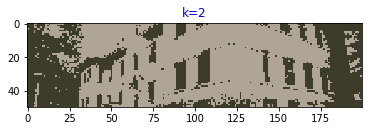

In [198]:
#### Data  manipulating

pixel = mpimg.imread('depMasa_gran10.jpg')
pixel = pixel.reshape((50*200, 3))
k = 2
dataSet = pixel 

#### Stopping rule: diff of distortion measure small enough

centroidList = initCentroids(dataSet, k)
clusterDict = minDistance(dataSet, centroidList)
# getCentroids(clusterDict)
# showCluster(centroidList, clusterDict)
newSSE = getSSE(centroidList, clusterDict)
oldSSE = 1

times = 1
while abs(newSSE - oldSSE) >= 0.01:
    centroidList = getCentroids(clusterDict)
    clusterDict = minDistance(dataSet, centroidList)
    oldSSE = newSSE
    newSSE = getSSE(centroidList, clusterDict)
    times += 1

# print(newSSE, times)

#### Show Compressed Plot

compressNew = []
for item in dataSet:
    vec1 = item
    group = -1
    minDis = float("inf") 
    for i in range(k):
        vec2 = centroidList[i]
        distance = l2Distance(vec1, vec2)  # error
        if distance < minDis:
            minDis = distance
            group = i  
    compressNew.append(centroidList[group])   

compressNew = np.array(compressNew)
compressNew = compressNew.reshape((50,200,3))

plt.imshow((compressNew).astype(np.uint8))       
plt.title('k=2', color='blue') 
plt.show()

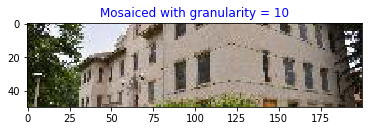

In [185]:
pixel = mpimg.imread('depMasa_gran10.jpg')
plt.imshow(pixel)      
plt.title('Mosaiced with granularity = 10', color='blue') 
plt.show()
# plt.savefig('depMasa_gran10_title.png')

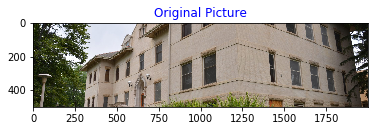

In [186]:
pixel = mpimg.imread('dep.jpg')
plt.imshow(pixel)      
plt.title('Original Picture', color='blue') 
plt.show()
# plt.savefig('OriginalPicture_title.png')